In [1]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot  as plt
from keras.utils.vis_utils import plot_model
import visualkeras

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

#train_path = 'Datasets/train'
#valid_path = 'Datasets/test'

train_path = 'D:/project/CT/train'
valid_path = 'D:/project/CT/test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

ex = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in ex.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('D:/project/CT/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(ex.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=ex.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

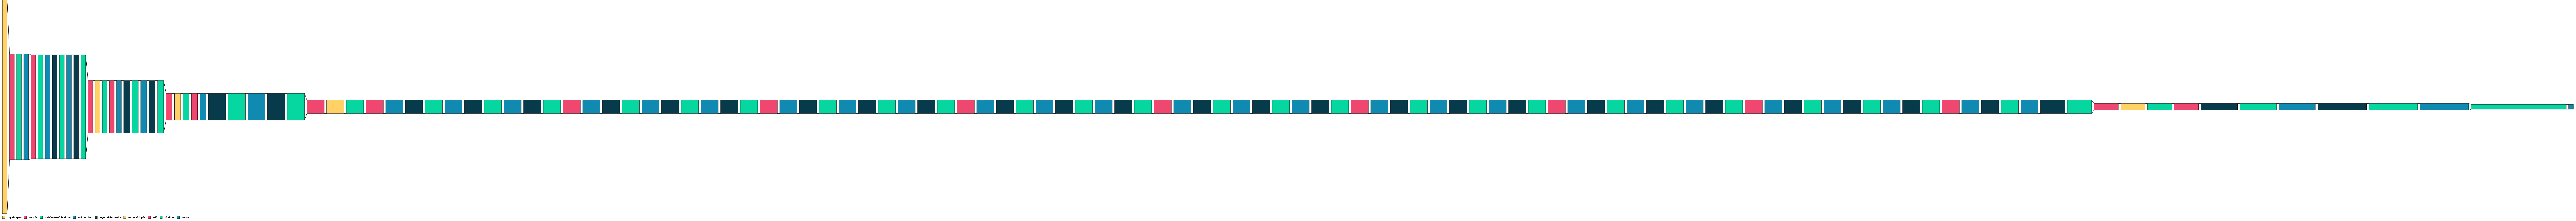

In [12]:
visualkeras.layered_view(model, legend=True, draw_volume=False).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model,legend=True, draw_volume=False)

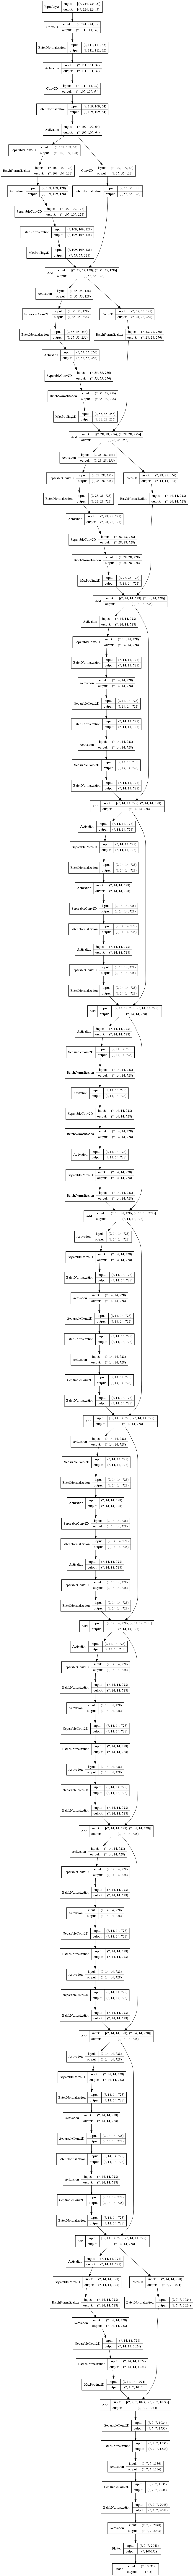

In [15]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [17]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [18]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/project/CT/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5571 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory('D:/project/CT/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2500 images belonging to 2 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
175/175 [==============================] - 1852s 11s/step - loss: 1.1716 - accuracy: 0.8754 - val_loss: 1.8280 - val_accuracy: 0.8040
Epoch 2/3
175/175 [==============================] - 1830s 10s/step - loss: 0.6000 - accuracy: 0.9212 - val_loss: 2.6567 - val_accuracy: 0.8192
Epoch 3/3
175/175 [==============================] - 1839s 11s/step - loss: 0.6184 - accuracy: 0.9277 - val_loss: 3.9648 - val_accuracy: 0.7268


In [22]:
#Generate Data to validate with new data 
#non covid set
valid_set=test_datagen.flow_from_directory('D:/project/CT/val NC',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 20 images belonging to 1 classes.


In [23]:
import numpy as np
pred=np.round(model.predict(valid_set))
#08 or 1
print(pred)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [24]:
#Generate Data to validate with new data 
#covid set
valid_set=test_datagen.flow_from_directory('D:/project/X-ray/val C',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 20 images belonging to 1 classes.


In [25]:
import numpy as np
pred=np.round(model.predict(valid_set))
#08 or 1
print(pred)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
